In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing librariess
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from xgboost import XGBRegressor



In [6]:
calories=pd.read_csv('D:\projects\calorieburn\calories.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\1125168589.py:1: SyntaxWarning: invalid escape sequence '\p'
  calories=pd.read_csv('D:\projects\calorieburn\calories.csv')


In [7]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise=pd.read_csv('exercise.csv')

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
calories_data=pd.concat([exercise,calories['Calories']],axis=1)

In [11]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
calories_data.shape

(15000, 9)

In [13]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

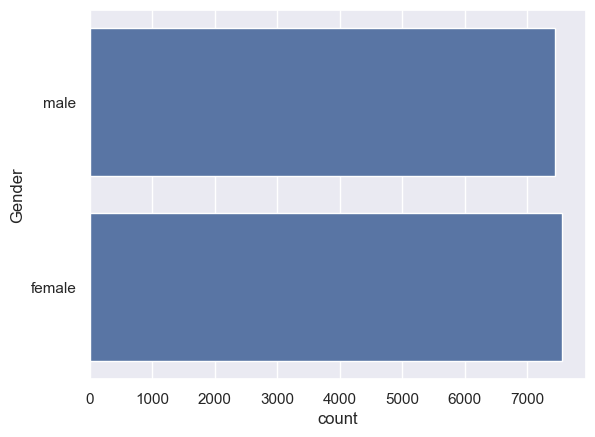

In [17]:
sns.countplot(calories_data['Gender'])

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\1950677799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

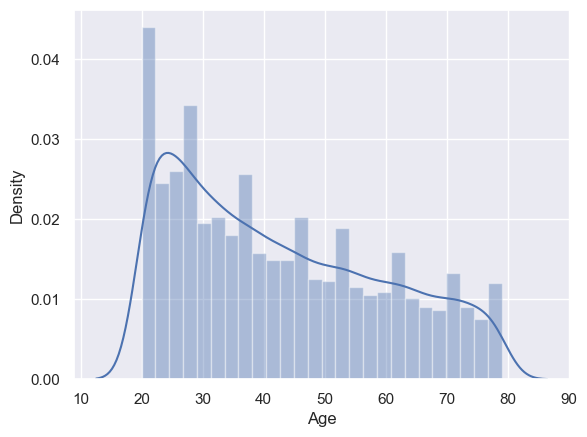

In [18]:
sns.distplot(calories_data['Age'])

In [19]:
calories_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

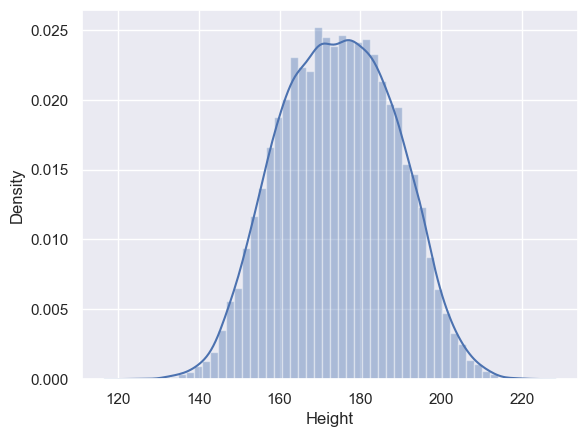

In [20]:
sns.distplot(calories_data['Height'])

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

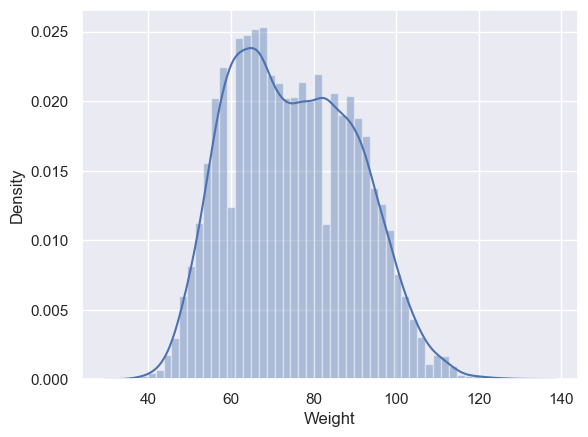

In [21]:
sns.distplot(calories_data['Weight'])

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\126571562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

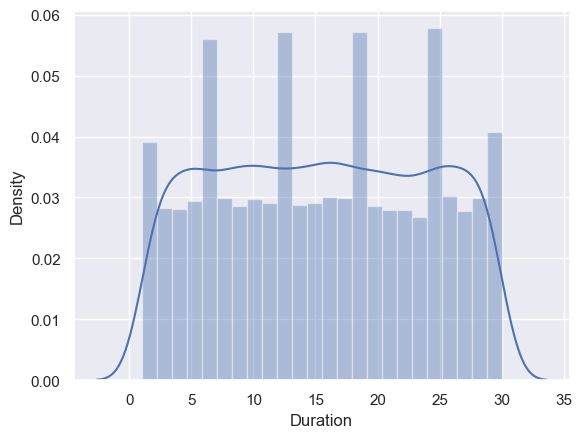

In [22]:
sns.distplot(calories_data['Duration'])

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\462248851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

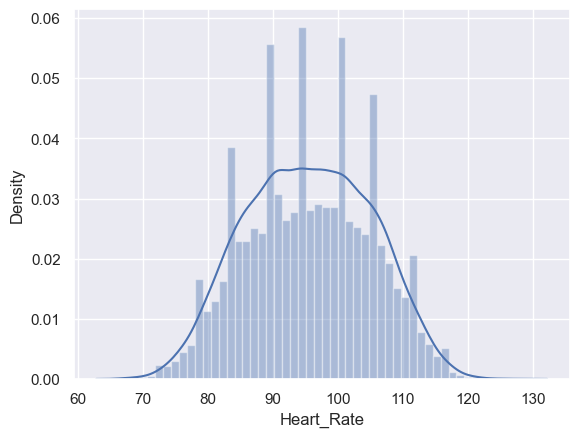

In [23]:
sns.distplot(calories_data['Heart_Rate'])

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\3252523048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

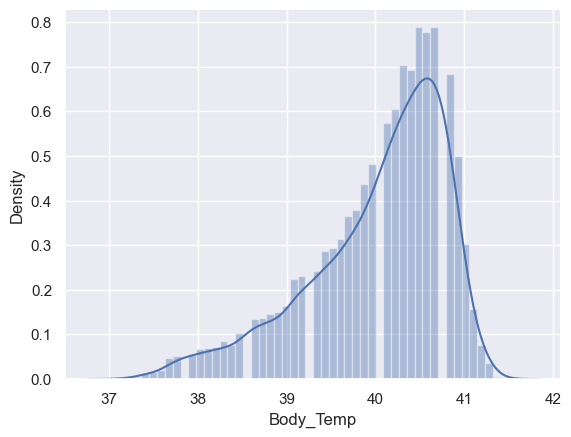

In [24]:
sns.distplot(calories_data['Body_Temp'])

In [25]:
calories_data.replace({"Gender":{'male':1,'female':2}},inplace=True)

C:\Users\MANASA\AppData\Local\Temp\ipykernel_15016\3072460715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':1,'female':2}},inplace=True)


In [26]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,2,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,2,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,2,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
correlation=calories_data.corr()

In [28]:
correlation

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

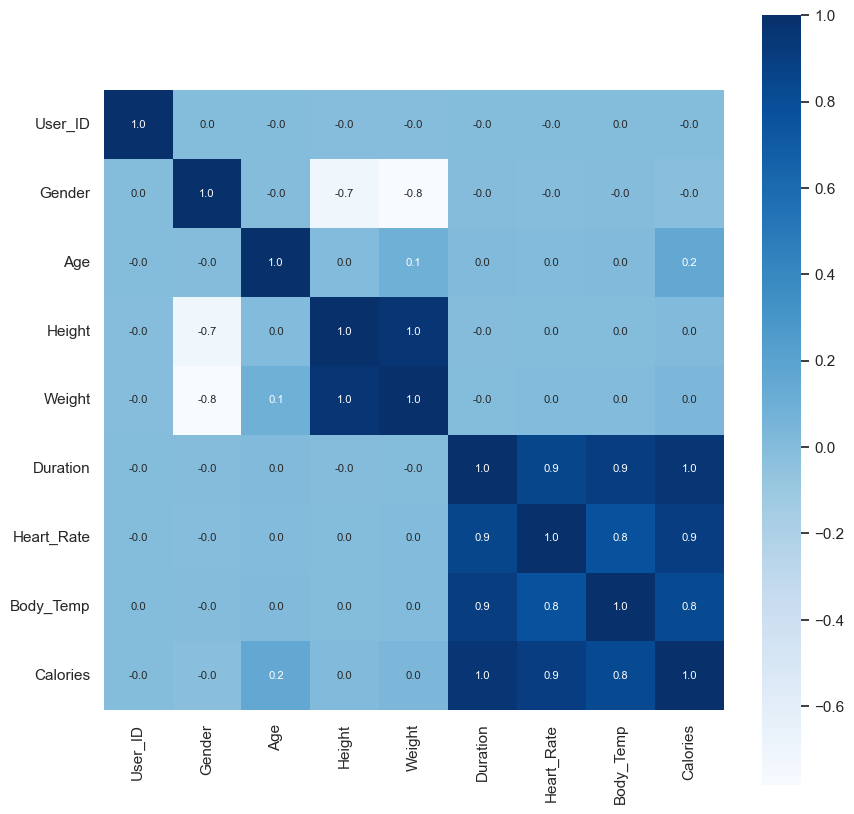

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [30]:
x=calories_data.drop(columns=["User_ID","Calories"])
y=calories_data['Calories']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [33]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
test_linear=model_linear.predict(x_test)
mae_linear=metrics.mean_absolute_error(y_test,test_linear)
print(mae_linear)

8.2453267986512


In [34]:
model_linear.score(x_test,y_test)

0.9687985536911826

In [35]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)
test_logistic=model_logistic.predict(x_test)
mae_logistic=metrics.mean_absolute_error(y_test,test_logistic)
print(mae_logistic)

15.883


c:\Users\MANASA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
model_logistic.score(x_test,y_test)

0.035

In [37]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
test_data_prediction=model.predict(x_test)

In [39]:
test_data_prediction

array([ 17.875612,  53.9696  ,  18.210052, ..., 139.4199  ,  80.02303 ,
        52.19    ], dtype=float32)

In [40]:
#mean absolute error
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [41]:
print("mean absolute error = ",mae)

mean absolute error =  1.512530811925729


In [42]:
model.score(x_test,y_test)

0.9986907587486947

In [43]:
from sklearn.svm import SVC
from sklearn import metrics

# Initialize the SVM model
model_svm = SVC()

# Fit the model
model_svm.fit(x_train, y_train)

# Predict on test data
test_svm = model_svm.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_svm = metrics.mean_absolute_error(y_test, test_svm)
print("Mean Absolute Error for SVM:", mae_svm)


Mean Absolute Error for SVM: 35.278333333333336


In [44]:
model_svm.score(x_test,y_test)

0.015

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

# Initialize the Decision Tree Regressor
model_dt = DecisionTreeRegressor()

# Fit the model
model_dt.fit(x_train, y_train)

# Predict on test data
test_dt = model_dt.predict(x_test)


In [46]:
model_dt.score(x_test,y_test)

0.9925662585727489

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor()

# Fit the model
model_rf.fit(x_train, y_train)

# Predict on test data
test_rf = model_rf.predict(x_test)


In [48]:
model_rf.score(x_test,y_test)

0.998046625696733

In [49]:
from sklearn.ensemble import AdaBoostRegressor
model_ab = AdaBoostRegressor()

# Fit the model
model_ab.fit(x_train, y_train)

# Predict on test data
test_ab = model_ab.predict(x_test)

In [50]:
model_ab.score(x_test,y_test)

0.9615531614922344

In [51]:
input_data = (2,34,179.0,71.0,13.0,100.0,	40.5	)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_dt.predict(input_data_reshaped)
print("Predicted value:", prediction[0])

Predicted value: 71.0


c:\Users\MANASA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [52]:
import pickle
filename ='calorie_model.pkl'
pickle.dump(model_dt, open(filename, 'wb'))
loaded_model = pickle.load(open('calorie_model.pkl', 'rb'))

In [53]:
import joblib
filename='calorie.joblib'
joblib.dump(model_dt,filename)

['calorie.joblib']